In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline
import seaborn as sns

In [2]:
data = xr.open_dataset('ONI.nc')
data

<xarray.Dataset>
Dimensions:  (time: 360)
Coordinates:
  * time     (time) datetime64[ns] 1991-01-16T12:00:00 ... 2020-12-16T12:00:00
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

In [3]:
ps_oni= data.sst.sel(time=slice('1991','2020'))

In [11]:
Year=['1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
Months=['January','February','March','April','May','June','July','August','September','October','November','December']


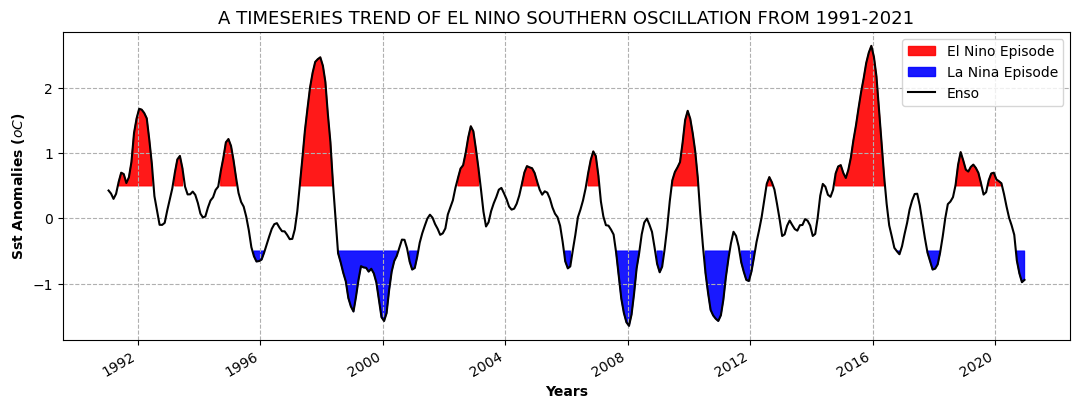

In [40]:
fig = plt.figure(figsize=(13, 4))  # assing figure size

plt.fill_between(  # plot with color in between
    ps_oni.time.data,  # x values
    # top boundary - y values above 0.5
    ps_oni.where(ps_oni >= 0.5).data,
    0.5,  # bottom boundary - 0.5
    color="red",  # color
    alpha=0.9,
    label= 'El Nino Episode',# transparency value
)
plt.fill_between(
     ps_oni.time.data,
     ps_oni.where( ps_oni <= -0.5).data,
    -0.5,
    color="blue",
    alpha=0.9,
    label= 'La Nina Episode'
)

ps_oni.plot(color="black",label= 'Enso')
plt.ylabel('Sst Anomalies ($oC$)', fontweight='bold')
plt.xlabel('Years', fontweight='bold')# plot the smoothed data
plt.grid(linestyle='--')
plt.legend()
plt.title("A TIMESERIES TREND OF EL NINO SOUTHERN OSCILLATION FROM 1991-2021", fontsize=13)
fig.savefig('enso.png')